In [1]:
import functions as fn
import pandas as pd
from importlib import reload
from tqdm import tqdm
from termcolor import colored
import matplotlib.pyplot as plt
from ooipy.tools import ooiplotlib as ooiplt

In [2]:
df = pd.read_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/oregon_hydrate.csv',sep = ',')

df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')


In [12]:
vessel_code=pd.read_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/Vessels/vessel_code.csv',sep = ',')

In [13]:
vessel_code.head()

,Type Code,Description
0,0,Not available (default)
1,20,"Wing in ground (WIG), all ships of this type"
2,21,"Wing in ground (WIG), Hazardous category A"
3,22,"Wing in ground (WIG), Hazardous category B"
4,23,"Wing in ground (WIG), Hazardous category C"


In [14]:
df=df.merge(vessel_code,how='left',left_on='VESSEL TYPE', right_on='Type Code')


In [17]:
df.drop('VESSEL TYPE',axis=1,inplace=True)

In [18]:
df.rename(columns={'Description':'VESSEL TYPE'},inplace=True)


In [19]:
df.columns

Index(['Unnamed: 0', 'MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG',
       'Heading', 'VesselName', 'IMO', 'CallSign', 'Status', 'LENGTH', 'Width',
       'Draft', 'Cargo', 'TransceiverClass', 'TIMESTAMP UTC',
       'oregon_slope_Lat', 'oregon_slope_Lon', 'oregon_slope_Loc', 'ship_Loc',
       'Southern_hydrate_Lat', 'Southern_hydrate_lon', 'Southern_hydrate_Loc',
       'distance(in km) oregon', 'distance(in km) hydrate', 'Type Code',
       'VESSEL TYPE'],
      dtype='object')

In [27]:
def get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration):
    reload(fn)
    if hydrophone_idx==1:
        hydro='Oregon_slope'
    elif hydrophone_idx==2:
        hydro='Southern_hydrate'
    suffix=str(inner_rad)+'_'+ str(outer_rad)+'.csv'
    ais=fn.choose_df_oregon_hydrate(df,hydrophone_idx)
    isolated_ships=fn.get_isolated_ships(ais,inner_rad,outer_rad,min_duration)
    isolated_ais=fn.isolated_ais(ais,isolated_ships,inner_rad)
    
    return isolated_ships,isolated_ais

In [21]:
hydrophone_idx=1
min_duration=10
inner_rad=10
outer_rad=30

In [22]:
ais = fn.choose_df_oregon_hydrate(df,hydrophone_idx)

 Max distance: 57.89 and Min distance: 0.0


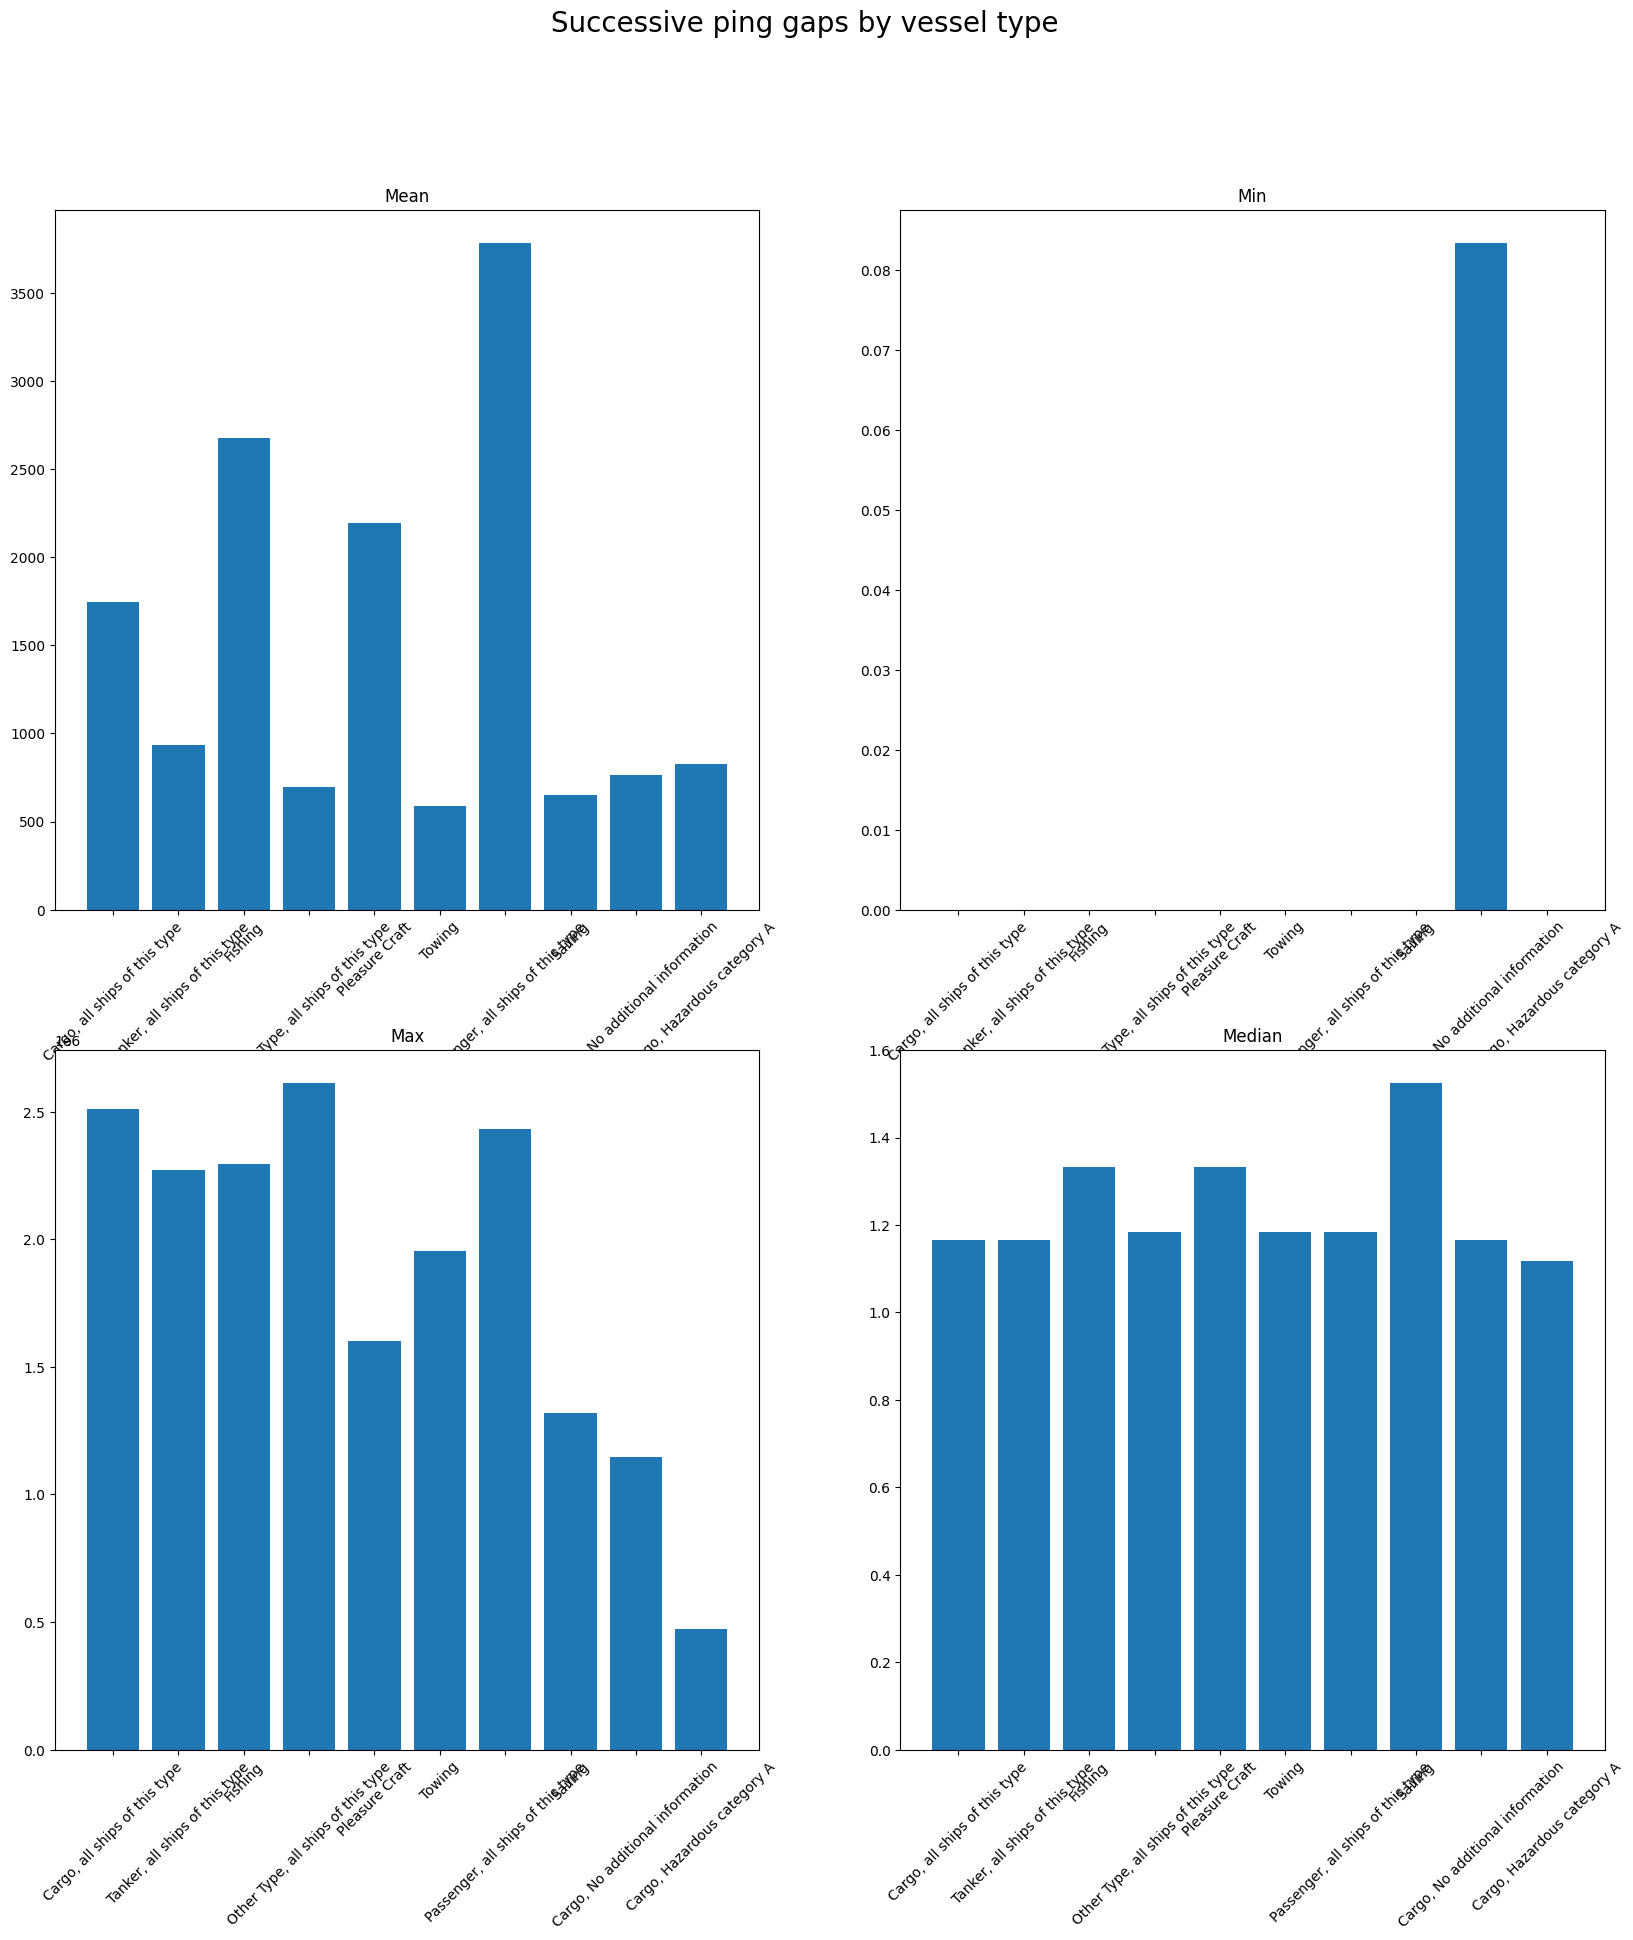

In [23]:

reload(fn)
df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')
ships_pings,vessels_pings= fn.ais_ping_distribution(ais,bar_show=True)

In [46]:
vessels_pings[vessels_pings['VESSEL TYPE']== 'Research/Survey Vessel']

,VESSEL TYPE,distinct count ships,mean_ping_time,min_ping_time,max_ping_time,median_ping_time
47,Research/Survey Vessel,19,201.287444,0.0,1.287155e+06,2.716667


In [24]:
   
   
ais_vessel=ais.groupby(by=['VESSEL TYPE']).agg({'MMSI': ['count',pd.Series.nunique],'distance(in km)':'mean'}).reset_index()
ais_vessel.columns=['VESSEL TYPE','number ais records','distinct count ships','mean distance']
ais_vessel=ais_vessel.sort_values(by='number ais records',ascending=False)
ais_vessel

,VESSEL TYPE,number ais records,distinct count ships,mean distance
5,"Cargo, all ships of this type",266881,1167,26.537150
10,"Other Type, all ships of this type",81048,93,20.540907
23,Towing,69588,55,29.033393
22,"Tanker, all ships of this type",60119,233,31.994608
6,Fishing,37693,144,32.267658
13,"Passenger, all ships of this type",10574,52,25.771852
0,"Cargo, Hazardous category A",7534,24,26.771001
14,Pleasure Craft,7498,88,28.908348
4,"Cargo, No additional information",4709,27,28.244347
1,"Cargo, Hazardous category B",2161,9,30.056687


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cargo, all ships of this type'),
  Text(1, 0, 'Tanker, all ships of this type'),
  Text(2, 0, 'Fishing'),
  Text(3, 0, 'Other Type, all ships of this type'),
  Text(4, 0, 'Pleasure Craft'),
  Text(5, 0, 'Towing'),
  Text(6, 0, 'Passenger, all ships of this type'),
  Text(7, 0, 'Sailing'),
  Text(8, 0, 'Cargo, No additional information'),
  Text(9, 0, 'Cargo, Hazardous category A')])

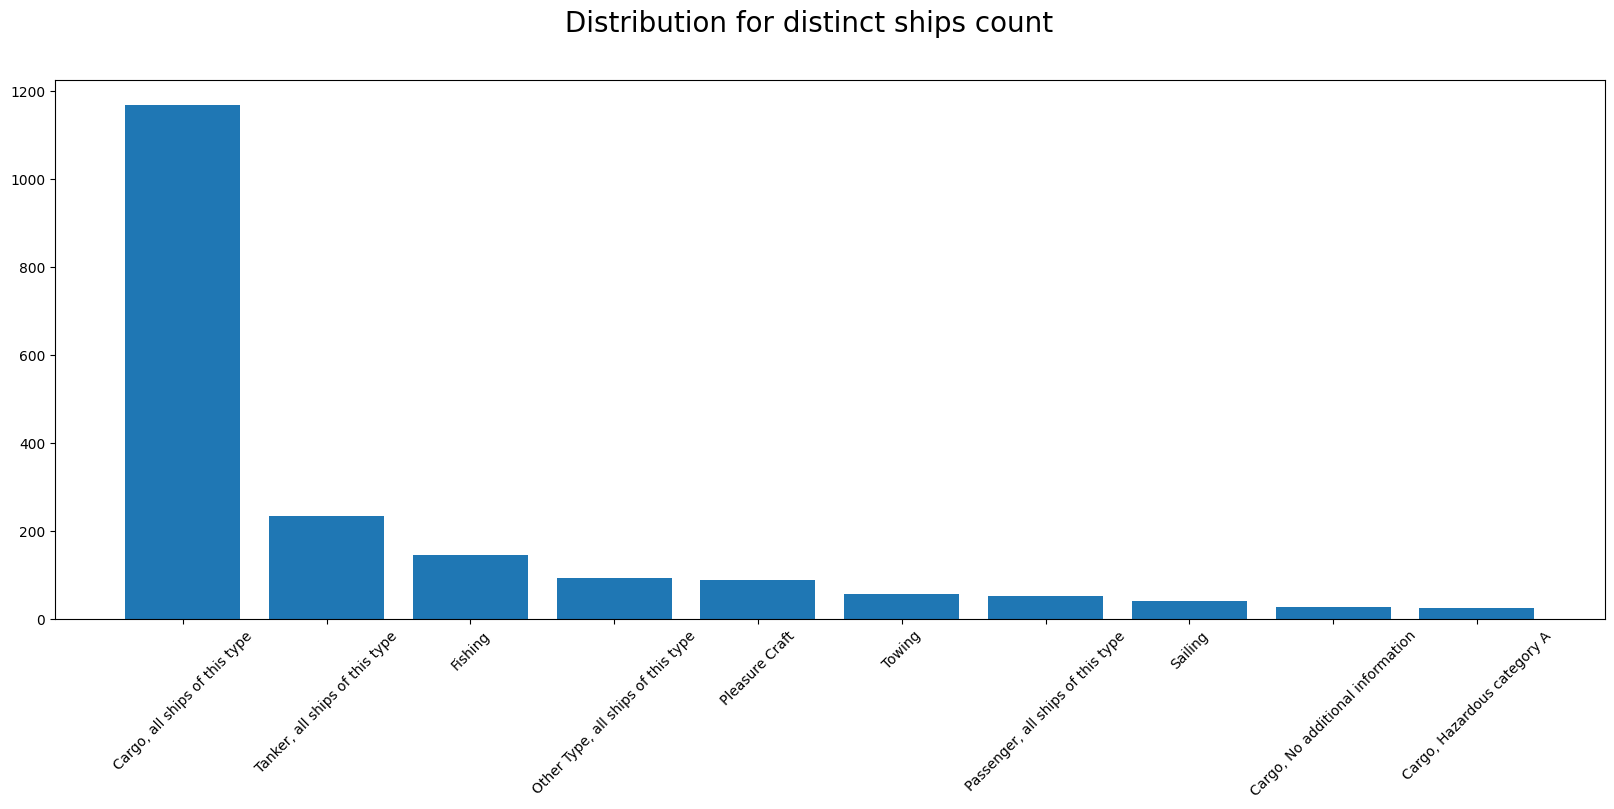

In [25]:
n=10
fig,ax= plt.subplots(1,1,figsize=(20,7))
fig.suptitle(' Distribution for distinct ships count', fontsize=20)
ais_vessel_dist=ais_vessel.sort_values(by='distinct count ships',ascending=False)
plt.bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct count ships'].iloc[:n])
plt.xticks(rotation = 45)


### EDA for isolated ships

In [28]:
hydrophone_idx=1
min_duration=10
inner_rad=10
outer_rad=30
isolated_ships, isolated_ais=get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration)

 Max distance: 57.89 and Min distance: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1105/1105 [00:08<00:00, 127.44it/s]


In [29]:
isolated_ais.head()

,MMSI,VESSEL TYPE,TIMESTAMP UTC,LENGTH,ship_Loc,LAT,LON,distance(in km),oregon_slope_Loc,isolated_ship_idx
636074,209316000,"Cargo, all ships of this type",2018-04-15 11:17:38,171.0,"(44.54624, -125.30274)",44.54624,-125.30274,7.73,"(44.5153, -125.3898)",0
636075,209316000,"Cargo, all ships of this type",2018-04-15 11:25:27,171.0,"(44.51987, -125.30154)",44.51987,-125.30154,7.04,"(44.5153, -125.3898)",0
636076,209316000,"Cargo, all ships of this type",2018-04-15 11:29:38,171.0,"(44.5054, -125.30091)",44.50540,-125.30091,7.15,"(44.5153, -125.3898)",0
471366,209316000,"Cargo, all ships of this type",2020-11-21 18:57:46,171.0,"(44.54321, -125.27211)",44.54321,-125.27211,9.86,"(44.5153, -125.3898)",1
471367,209316000,"Cargo, all ships of this type",2020-11-21 18:59:46,171.0,"(44.53621, -125.27181)",44.53621,-125.27181,9.66,"(44.5153, -125.3898)",1


In [32]:
isolated_ais[isolated_ais['isolated_ship_idx']==10]


,MMSI,VESSEL TYPE,TIMESTAMP UTC,LENGTH,ship_Loc,LAT,LON,distance(in km),oregon_slope_Loc,isolated_ship_idx
666525,212301000,"Cargo, all ships of this type",2022-01-11 06:42:07,179.0,"(44.49112, -125.26944)",44.49112,-125.26944,9.94,"(44.5153, -125.3898)",10
666526,212301000,"Cargo, all ships of this type",2022-01-11 06:43:25,179.0,"(44.4963, -125.26962)",44.49630,-125.26962,9.79,"(44.5153, -125.3898)",10
666527,212301000,"Cargo, all ships of this type",2022-01-11 06:44:31,179.0,"(44.50071, -125.26979)",44.50071,-125.26979,9.68,"(44.5153, -125.3898)",10
666528,212301000,"Cargo, all ships of this type",2022-01-11 06:46:50,179.0,"(44.50988, -125.27012)",44.50988,-125.27012,9.54,"(44.5153, -125.3898)",10
666529,212301000,"Cargo, all ships of this type",2022-01-11 06:48:01,179.0,"(44.51468, -125.27032)",44.51468,-125.27032,9.50,"(44.5153, -125.3898)",10
666530,212301000,"Cargo, all ships of this type",2022-01-11 06:49:25,179.0,"(44.52023, -125.2706)",44.52023,-125.27060,9.49,"(44.5153, -125.3898)",10
666531,212301000,"Cargo, all ships of this type",2022-01-11 06:51:13,179.0,"(44.52743, -125.27097)",44.52743,-125.27097,9.54,"(44.5153, -125.3898)",10
666532,212301000,"Cargo, all ships of this type",2022-01-11 06:52:19,179.0,"(44.53185, -125.27116)",44.53185,-125.27116,9.61,"(44.5153, -125.3898)",10
666533,212301000,"Cargo, all ships of this type",2022-01-11 06:53:43,179.0,"(44.53743, -125.27139)",44.53743,-125.27139,9.73,"(44.5153, -125.3898)",10
666534,212301000,"Cargo, all ships of this type",2022-01-11 06:54:44,179.0,"(44.54145, -125.27154)",44.54145,-125.27154,9.84,"(44.5153, -125.3898)",10


In [31]:
temp=ais[(ais['TIMESTAMP UTC']>='2017-04-17 05:03:59') & (ais['TIMESTAMP UTC']<='2017-04-17 05:49:20') & (ais['distance(in km)']<inner_rad)]
temp

,MMSI,VESSEL TYPE,TIMESTAMP UTC,LENGTH,ship_Loc,LAT,LON,distance(in km),oregon_slope_Loc


In [33]:
def isolated_ships_describe(isolated_ships, isolated_ais):
    ais_vessel=isolated_ais.groupby(by=['VESSEL TYPE']).agg({'MMSI': ['count',pd.Series.nunique],'isolated_ship_idx':pd.Series.nunique,'distance(in km)':'mean'}).reset_index()
    ais_vessel.columns=['VESSEL TYPE','number ais records','distinct count ships','distinct instances','mean distance']
    ais_vessel=ais_vessel.sort_values(by='distinct count ships',ascending=False)
    isolated_vessel=isolated_ships.groupby(by=['VESSEL TYPE']).agg({'len_of_recording':['mean','median']}).reset_index()
    isolated_vessel.columns=['VESSEL TYPE','mean len_of_recording','median len_of_recording']
    df_final=ais_vessel.merge(isolated_vessel,how='left',on='VESSEL TYPE')
    return df_final





In [36]:

ais_vessel_dist=isolated_ships_describe(isolated_ships, isolated_ais)
ais_vessel_dist

,VESSEL TYPE,number ais records,distinct count ships,distinct instances,mean distance,mean len_of_recording,median len_of_recording
0,"Cargo, all ships of this type",9110,254,502,7.466581,25.637630,25.366667
1,"Tanker, all ships of this type",1226,39,60,7.773923,28.644068,28.000000
2,"Other Type, all ships of this type",7256,28,116,3.155296,123.946953,42.833333
3,Fishing,448,26,31,7.518192,39.889855,35.316667
4,Towing,1823,21,79,7.715754,34.327083,31.000000
5,"Cargo, Hazardous category A",342,9,22,8.582953,19.340152,19.883333
6,"Cargo, No additional information",124,7,8,8.398387,21.576190,20.166667
7,"Passenger, all ships of this type",422,7,24,7.492180,31.139583,22.658333
8,Pleasure Craft,233,6,6,6.947940,56.102778,55.233333
9,Sailing,138,4,5,5.145145,59.400000,61.516667


Text(0.5, 1.0, 'distinct instances')

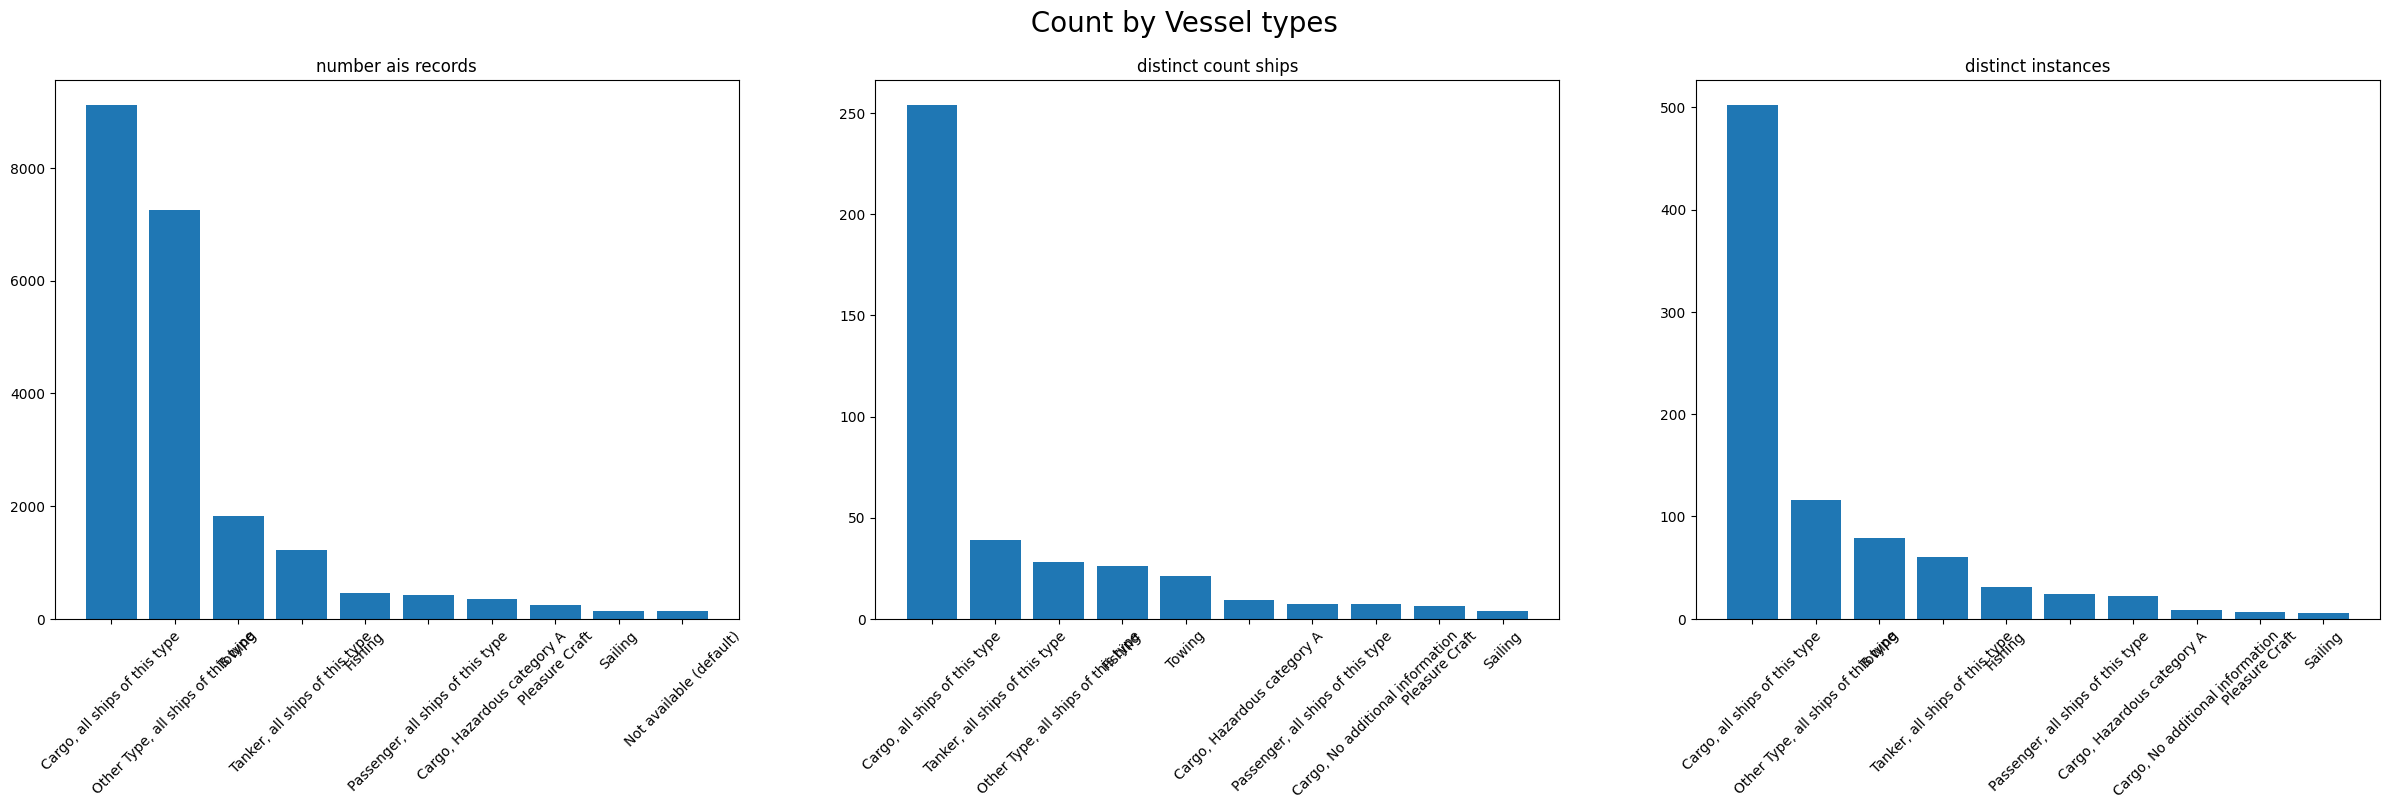

In [37]:
n=10
fig,ax= plt.subplots(1,3,figsize=(30,7))
fig.suptitle(' Count by Vessel types', fontsize=20)
ais_vessel_dist=ais_vessel_dist.sort_values(by='number ais records',ascending=False)
ax[0].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['number ais records'].iloc[:n])
ax[0].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[0].set_title('number ais records')
ais_vessel_dist=ais_vessel_dist.sort_values(by='distinct count ships',ascending=False)
ax[1].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct count ships'].iloc[:n])
ax[1].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[1].set_title('distinct count ships')
ais_vessel_dist=ais_vessel_dist.sort_values(by='distinct instances',ascending=False)
ax[2].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct instances'].iloc[:n])
ax[2].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[2].set_title('distinct instances')
